In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('fish_participant.csv')

In [3]:
raw_data.sort_values(by='Weight',ascending = False)

,Species,Weight,Length1,Length2,Length3,Height,Width
13,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
84,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
63,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
24,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
41,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420
...,...,...,...,...,...,...,...
33,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
62,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
28,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
8,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


In [4]:
#display the descriptive statistics of the variables
raw_data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,111,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,401.676577,26.447748,28.615315,31.422523,9.015701,4.480407
std,NaN,338.510755,9.795155,10.498781,11.306311,4.225369,1.696240
min,NaN,5.900000,7.500000,8.400000,8.800000,1.738800,1.047600
25%,NaN,142.500000,20.000000,22.000000,23.500000,6.138850,3.551400
50%,NaN,300.000000,25.400000,27.500000,30.100000,8.145400,4.335000
75%,NaN,682.500000,33.750000,36.250000,40.150000,12.143400,5.658300


In [5]:
raw_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
#compute for avg length
raw_data['avg_length'] = raw_data[['Length1', 'Length2', 'Length3']].mean(axis=1)
raw_data

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950,21.833333
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203,22.766667
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142,15.733333
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854,33.900000
...,...,...,...,...,...,...,...,...
106,Perch,197.0,23.5,25.6,27.0,6.5610,4.2390,25.366667
107,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944,20.966667
108,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957,21.000000
109,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640,36.500000


### Check for outliers and remove them

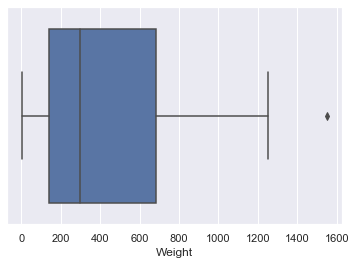

In [7]:
sns.boxplot(raw_data['Weight'])

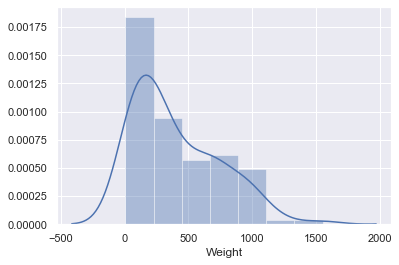

In [180]:
# display the probability distribution function (PDF) of a variable
# The PDF will show how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers

sns.distplot(raw_data["Weight"])

In [181]:
# Removed the top 1% of the data about 'Weight'
# Declare a variable that will be equal to the 99th percentile of the 'Weight' variable
q = raw_data["Weight"].quantile(0.99)
# Create a new df, with the condition that all weight must be below the 99th percentile of 'Weight'
data_1 = raw_data[raw_data["Weight"]<q]

data_1.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length
count,109,109.00,109.00,109.00,109.00,109.00,109.00,109.00
unique,7,nan,nan,nan,nan,nan,nan,nan
top,Perch,nan,nan,nan,nan,nan,nan,nan
freq,39,nan,nan,nan,nan,nan,nan,nan
mean,NaN,383.36,25.94,28.08,30.86,9.00,4.44,28.29
std,NaN,312.25,9.13,9.79,10.61,4.26,1.69,9.83
min,NaN,5.90,7.50,8.40,8.80,1.74,1.05,8.23
25%,NaN,140.00,20.00,22.00,23.50,6.11,3.55,21.83
50%,NaN,290.00,25.20,27.30,30.00,7.79,4.32,27.27
75%,NaN,650.00,32.70,36.00,39.40,12.35,5.58,36.10


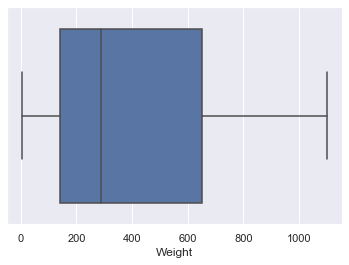

In [182]:
#check to see if outliers have been removed
sns.boxplot(data_1['Weight'])

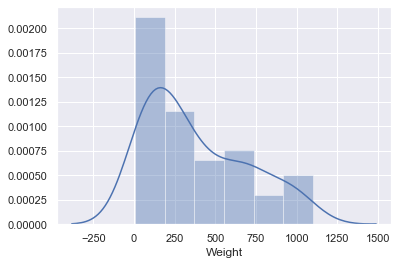

In [183]:
# check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1["Weight"])

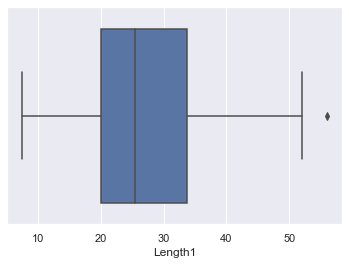

In [184]:
# treat the other numerical variables in a similar way
sns.boxplot(raw_data['Length1'])

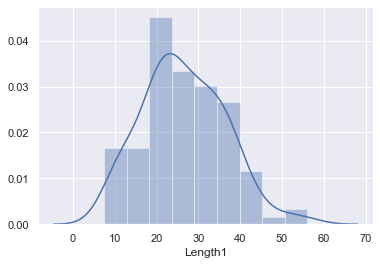

In [185]:
sns.distplot(raw_data['Length1'])

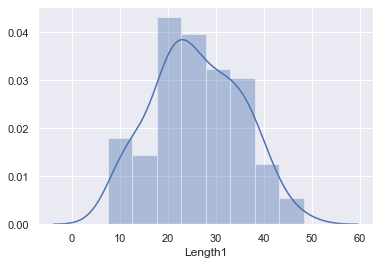

In [22]:
q = raw_data['Length1'].quantile(0.99)
data_2 = data_1[data_1['Length1']<q]
sns.distplot(data_2['Length1'])

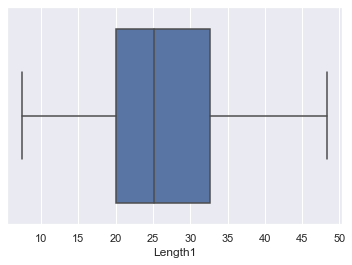

In [23]:
sns.boxplot(data_1['Length1'])

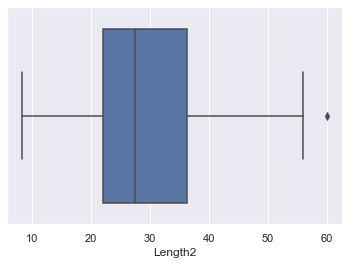

In [94]:
sns.boxplot(raw_data['Length2'])

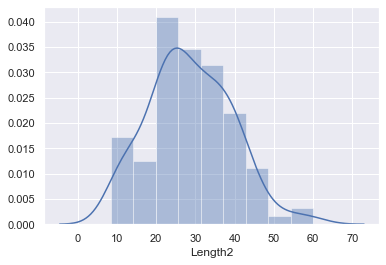

In [24]:
sns.distplot(raw_data['Length2'])

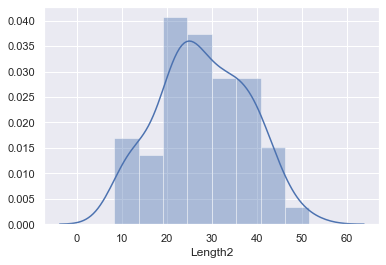

In [25]:
q = raw_data['Length2'].quantile(0.99)
data_3 = data_2[data_2['Length2']<q]
sns.distplot(data_3['Length2'])

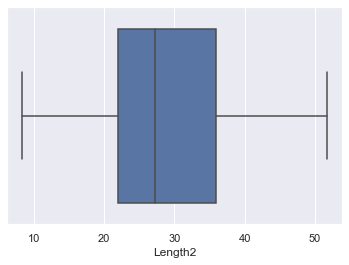

In [26]:
sns.boxplot(data_1['Length2'])

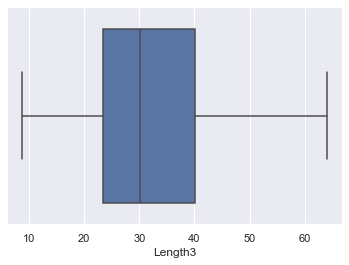

In [95]:
sns.boxplot(raw_data['Length3'])

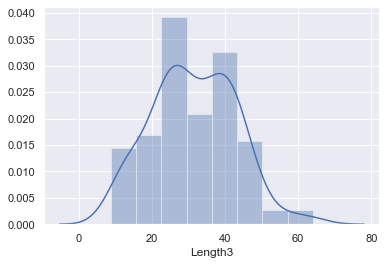

In [27]:
sns.distplot(raw_data['Length3'])

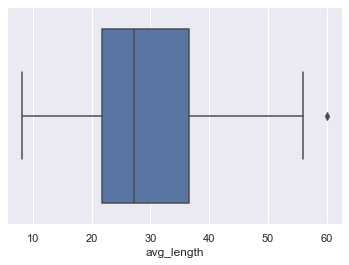

In [96]:
sns.boxplot(raw_data['avg_length'])

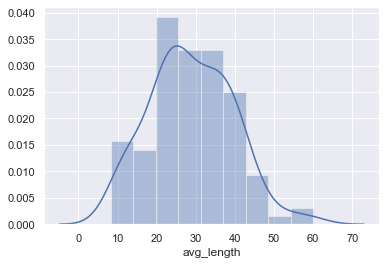

In [30]:
sns.distplot(raw_data['avg_length'])

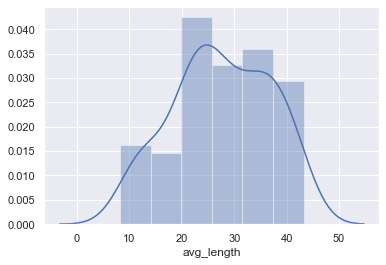

In [104]:
q = raw_data['avg_length'].quantile(0.99)
data_4 = data_5[data_5['avg_length']<q]
sns.distplot(data_4['avg_length'])

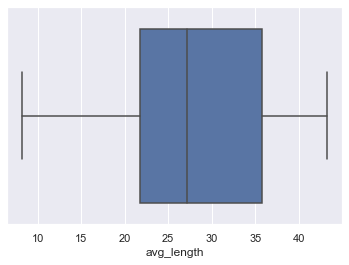

In [110]:
sns.boxplot(data_4['avg_length'])

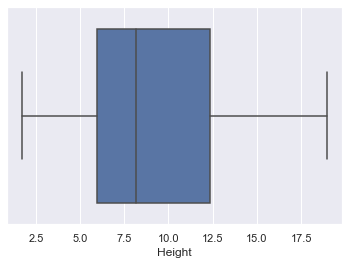

In [105]:
sns.boxplot(data_4['Height'])

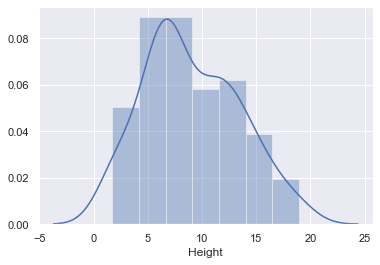

In [111]:
sns.distplot(data_4['Height'])

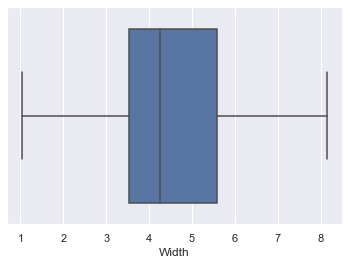

In [112]:
sns.boxplot(data_4['Width'])

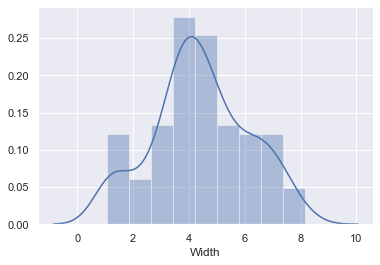

In [113]:
sns.distplot(data_4['Width'])

In [186]:
data_cleaned = data_4.reset_index(drop=True)

In [187]:
data_cleaned.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length
count,105,105.00,105.00,105.00,105.00,105.00,105.00,105.00
unique,7,nan,nan,nan,nan,nan,nan,nan
top,Perch,nan,nan,nan,nan,nan,nan,nan
freq,39,nan,nan,nan,nan,nan,nan,nan
mean,NaN,371.42,25.23,27.33,30.11,9.04,4.41,27.56
std,NaN,310.04,8.51,9.17,10.04,4.33,1.71,9.22
min,NaN,5.90,7.50,8.40,8.80,1.74,1.05,8.23
25%,NaN,125.00,19.80,21.50,23.50,5.95,3.52,21.80
50%,NaN,273.00,25.00,26.50,29.20,8.15,4.25,27.17
75%,NaN,650.00,31.90,35.00,39.00,12.38,5.58,35.80


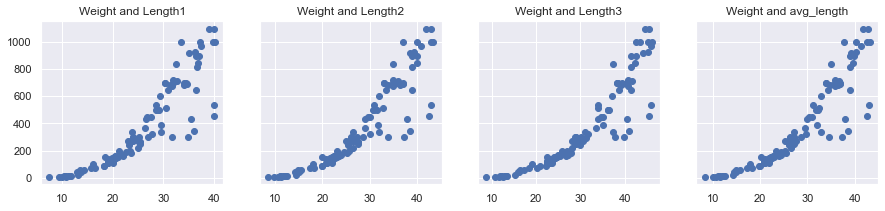

In [116]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax1.scatter(data_cleaned['Length1'],data_cleaned['Weight'])
ax1.set_title('Weight and Length1')
ax2.scatter(data_cleaned['Length2'],data_cleaned['Weight'])
ax2.set_title('Weight and Length2')
ax3.scatter(data_cleaned['Length3'],data_cleaned['Weight'])
ax3.set_title('Weight and Length3')
ax4.scatter(data_cleaned['avg_length'],data_cleaned['Weight'])
ax4.set_title('Weight and avg_length')

plt.show()

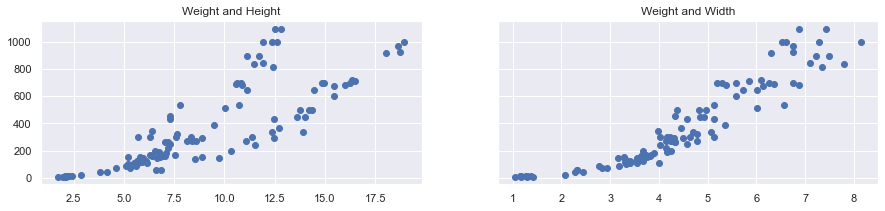

In [117]:
f, (ax4, ax5) = plt.subplots(1, 2, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax4.scatter(data_cleaned['Height'],data_cleaned['Weight'])
ax4.set_title('Weight and Height')
ax5.scatter(data_cleaned['Width'],data_cleaned['Weight'])
ax5.set_title('Weight and Width')


plt.show()

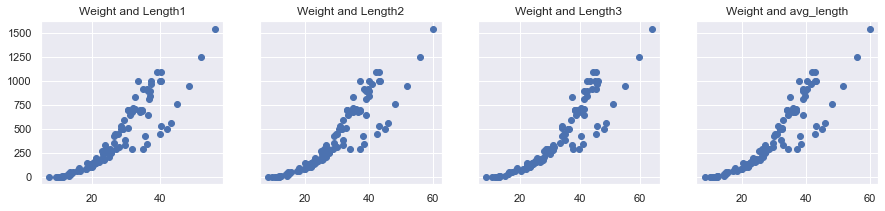

In [118]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax1.scatter(raw_data['Length1'],raw_data['Weight'])
ax1.set_title('Weight and Length1')
ax2.scatter(raw_data['Length2'],raw_data['Weight'])
ax2.set_title('Weight and Length2')
ax3.scatter(raw_data['Length3'],raw_data['Weight'])
ax3.set_title('Weight and Length3')
ax4.scatter(raw_data['avg_length'],raw_data['Weight'])
ax4.set_title('Weight and avg_length')

plt.show()

In [188]:
# Transform 'Weight' with a log transformation
log_weight = np.log(data_cleaned['Weight'])
# add it to the data frame
data_cleaned['log_weight'] = log_weight
data_cleaned

,Species,Weight,Length1,Length2,Length3,Height,Width,avg_length,log_weight
0,Bream,430.00,26.50,29.00,34.00,12.44,5.13,29.83,6.06
1,Perch,110.00,20.00,22.00,23.50,5.52,4.00,21.83,4.70
2,Roach,160.00,20.50,22.50,25.30,7.03,3.82,22.77,5.08
3,Parkki,60.00,14.30,15.50,17.40,6.58,2.31,15.73,4.09
4,Bream,700.00,30.40,33.00,38.30,14.86,5.29,33.90,6.55
5,Perch,40.00,13.80,15.00,16.00,3.82,2.43,14.93,3.69
6,Bream,700.00,30.40,33.00,38.50,14.94,5.20,33.97,6.55
7,Perch,250.00,25.40,27.50,28.90,7.28,4.57,27.27,5.52
8,Smelt,6.70,9.30,9.80,10.80,1.74,1.05,9.97,1.90
9,Bream,242.00,23.20,25.40,30.00,11.52,4.02,26.20,5.49


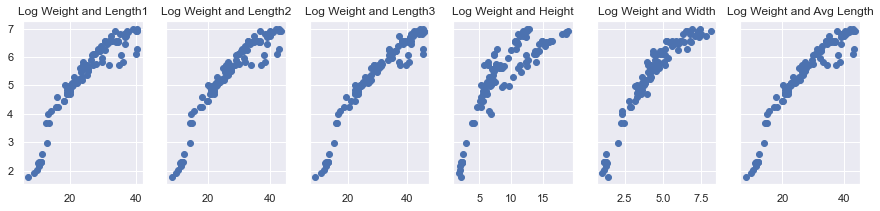

In [120]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize =(15,3)) #sharey -> share 'Weight' as y
ax1.scatter(data_cleaned['Length1'],data_cleaned['log_weight'])
ax1.set_title('Log Weight and Length1')
ax2.scatter(data_cleaned['Length2'],data_cleaned['log_weight'])
ax2.set_title('Log Weight and Length2')
ax3.scatter(data_cleaned['Length3'],data_cleaned['log_weight'])
ax3.set_title('Log Weight and Length3')
ax4.scatter(data_cleaned['Height'],data_cleaned['log_weight'])
ax4.set_title('Log Weight and Height')
ax5.scatter(data_cleaned['Width'],data_cleaned['log_weight'])
ax5.set_title('Log Weight and Width')
ax6.scatter(data_cleaned['avg_length'],data_cleaned['log_weight'])
ax6.set_title('Log Weight and Avg Length')

plt.show()

In [189]:
# Since log weight variable will be used, we can drop the old 'Weight' one
data_cleaned = data_cleaned.drop(['Weight'],axis=1)

In [122]:
data_cleaned.columns.values

array(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'avg_length', 'log_weight'], dtype=object)

In [139]:
# check for multicollinearity... after several trial and error, the combination of Length3, Height and
# width gave the lowest VIF's

from statsmodels.stats.outliers_influence import variance_inflation_factor
#variables = data_cleaned[['avg_length', 'Height', 'Width']]
variables = data_cleaned[['Length3', 'Height', 'Width']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif = vif.sort_values(by='VIF',ascending = False)
vif['VIF'] = round(vif['VIF'] ,2)
vif["Features"] = variables.columns

In [140]:
vif

,VIF,Features
0,53.22,Length3
2,50.34,Height
1,16.67,Width


In [190]:
# drop the other variables
data_no_multicollinearity = data_cleaned.drop(['Length1', 'Length2','avg_length'],axis=1)

In [191]:
# create dummies to include the categorical data in the regression
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [192]:
data_with_dummies.head()

,Length3,Height,Width,log_weight,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,34.00,12.44,5.13,6.06,0,0,0,0,0,0
1,23.50,5.52,4.00,4.70,0,1,0,0,0,0
2,25.30,7.03,3.82,5.08,0,0,0,1,0,0
3,17.40,6.58,2.31,4.09,1,0,0,0,0,0
4,38.30,14.86,5.29,6.55,0,0,0,0,0,0


In [144]:
data_with_dummies.columns.values

array(['Length3', 'Height', 'Width', 'log_weight', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish'], dtype=object)

In [145]:
cols = ['log_weight', 'Length3', 'Height', 'Width', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish']

In [146]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_weight,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,6.06,34.00,12.44,5.13,0,0,0,0,0,0
1,4.70,23.50,5.52,4.00,0,1,0,0,0,0
2,5.08,25.30,7.03,3.82,0,0,0,1,0,0
3,4.09,17.40,6.58,2.31,1,0,0,0,0,0
4,6.55,38.30,14.86,5.29,0,0,0,0,0,0


### Linear Regression Model

In [194]:
# The target(s) (dependent variable) is 'log weight'
targets = data_preprocessed['log_weight']

In [148]:
# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_weight'],axis=1)

In [149]:
#scale the data

# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [150]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [195]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=10)

In [152]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
# check the outputs of the regression
# store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)
y_hat

array([4.72237666, 5.80599928, 7.41687249, 5.18546647, 4.68371298,
       7.0885927 , 6.76478763, 4.99906193, 5.21899462, 3.8876966 ,
       5.07571857, 4.24967712, 6.35420763, 5.37236772, 6.25011538,
       5.5147125 , 6.81603747, 6.67545558, 6.96155451, 6.28520081,
       6.91069262, 6.35174603, 3.92554752, 4.91792152, 2.2042756 ,
       6.48491578, 4.33223841, 6.27006095, 5.24240533, 6.92752444,
       2.30222174, 2.28378107, 4.99712157, 6.54214033, 5.39505119,
       5.70474841, 5.02806836, 4.76815457, 4.66160764, 5.51264873,
       4.56585088, 7.07946275, 6.5917427 , 5.58036064, 7.06109452,
       6.51575563, 6.69097974, 2.14145645, 5.40300169, 2.26434677,
       4.8932286 , 7.14821469, 5.50577332, 6.92409227, 4.3149079 ,
       6.6285046 , 5.99068498, 6.08891042, 5.36562853, 6.00080735,
       3.11877058, 5.60121534, 4.76831507, 4.78262239, 6.68692612,
       4.66611693, 6.00833509, 5.81618445, 6.41304109, 6.20338035,
       6.07548156, 5.84852615, 6.5258216 , 6.02315764, 2.29196

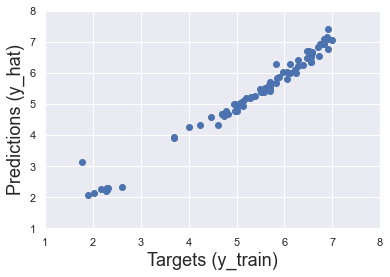

In [197]:
# compare the targets (y_train) and the predictions (y_hat)
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(1,8)
plt.ylim(1,8)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

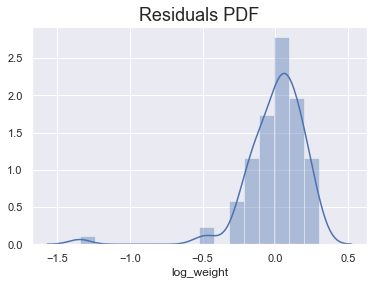

In [198]:
# check the model with a residual plot
# plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

In [199]:
# Find the R-squared of the model
reg.score(x_train,y_train)


0.9761573079345361

In [200]:
x_train.shape

(84, 9)

In [201]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1] 
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9732575210617095

In [202]:
# Obtain the bias (intercept) of the regression
reg.intercept_

5.341166785140335

In [203]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([ 1.03638624, -0.251437  ,  0.26566618,  0.04074781, -0.1504975 ,
       -0.2563194 , -0.1106693 , -0.45453129, -0.02722761])

In [204]:
# Create a regression summary
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Length3,1.04
1,Height,-0.25
2,Width,0.27
3,Species_Parkki,0.04
4,Species_Perch,-0.15
5,Species_Pike,-0.26
6,Species_Roach,-0.11
7,Species_Smelt,-0.45
8,Species_Whitefish,-0.03


In [205]:
# Check the different categories in the 'Species' variable
data_cleaned['Species'].unique()

array(['Bream', 'Perch', 'Roach', 'Parkki', 'Smelt', 'Whitefish', 'Pike'],
      dtype=object)

### Testing

In [163]:
y_hat_test = reg.predict(x_test)

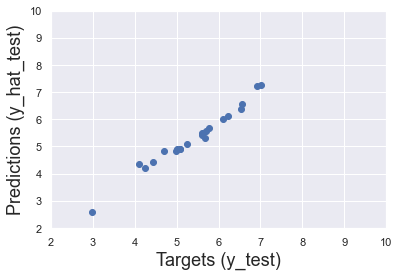

In [207]:
# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(2,10)
plt.ylim(2,10)
plt.show()

In [208]:
# manually check these predictions
# To obtain the actual weight, we take the exponential of the log_weight
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,202.00
1,126.33
2,257.98
3,239.59
4,135.41
5,454.86
6,1417.85
7,697.04
8,78.01
9,401.77


In [209]:
# include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,202.00,nan
1,126.33,110.00
2,257.98,160.00
3,239.59,60.00
4,135.41,nan
5,454.86,nan
6,1417.85,nan
7,697.04,nan
8,78.01,nan
9,401.77,nan


In [210]:
# to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   5.67
1   4.98
2   5.70
3   5.61
4   5.08
Name: log_weight, dtype: float64

In [211]:
# overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log weight
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,202.00,290.00
1,126.33,145.00
2,257.98,300.00
3,239.59,273.00
4,135.41,160.00
5,454.86,500.00
6,1417.85,1100.00
7,697.04,700.00
8,78.01,60.00
9,401.77,450.00


In [212]:
# calculate the difference between the targets and the predictions
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [213]:
# check to see how far off we are from the result percentage-wise
# take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,202.00,290.00,88.00,30.34
1,126.33,145.00,18.67,12.88
2,257.98,300.00,42.02,14.01
3,239.59,273.00,33.41,12.24
4,135.41,160.00,24.59,15.37
5,454.86,500.00,45.14,9.03
6,1417.85,1100.00,-317.85,28.90
7,697.04,700.00,2.96,0.42
8,78.01,60.00,-18.01,30.01
9,401.77,450.00,48.23,10.72


In [214]:
# display the descriptives
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,21.00,21.00,21.00,21.00
mean,345.07,335.03,-10.03,15.76
std,393.10,303.87,118.34,10.43
min,13.52,19.70,-391.04,0.42
25%,127.55,145.00,1.98,10.05
50%,202.00,270.00,24.59,14.01
75%,401.77,450.00,41.91,15.96
max,1417.85,1100.00,88.00,39.10


In [215]:
# check these outputs manually
pd.options.display.max_rows = 999
# display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
7,697.04,700.00,2.96,0.42
16,83.41,85.00,1.59,1.87
11,68.02,70.00,1.98,2.82
18,295.21,320.00,24.79,7.75
5,454.86,500.00,45.14,9.03
14,134.93,150.00,15.07,10.05
9,401.77,450.00,48.23,10.72
3,239.59,273.00,33.41,12.24
12,597.22,685.00,87.78,12.82
1,126.33,145.00,18.67,12.88


In [216]:
# check the MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_hat)
mse

0.04689354044731781

In [217]:
# check the RMSE
root_mse = np.sqrt(mse)
root_mse

0.21654916404206648